## Lab 2 Template

zID: z5325987

Name: Wanqing Yang

Below we provide sample code for the SIFT detector using SIFT_create() function from opencv_contrib package

In [1]:
import math
import numpy as np
import sys
import cv2
import matplotlib.pyplot as plt

In [2]:
cv2.__version__

'4.6.0'

In [3]:
class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.03
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector

In [4]:
# Function to rotate an input image
# parameters:
            # image: image to rotate
            # x: x-coordinate of point we wish to rotate around
            # y: y-coordinate of point we wish to rotate around
            # angle: degrees to rotate image by
# returns: rotated copy of the original image

def rotate(image, x, y, angle):
    rot_matrix = cv2.getRotationMatrix2D((x, y), angle, 1.0)
    h, w = image.shape[:2]

    return cv2.warpAffine(image, rot_matrix, (w, h))

In [5]:
# Function to get coordinates of center point in an image
# parameter:
            # image: image that will be rotated
# returns: (x,y) coordinates of point at the centre of an image

def get_img_center(image):
    height, width = image.shape[:2]
    center = height // 2, width // 2
    return center

## Task 1: Read the given sample image "Village.png" and compute the SIFT features of the given image.
- Extract SIFT features with default parameters and show the keypoints on the image.
- To achieve better visualization of the keypoints, reduce the number of keypoints. Hint: Vary the parameter contrastThreshold or nfeatures so that the number of keypoints becomes about 10% of all default keypoints.

The number of SIFT features with default parameters:  2605


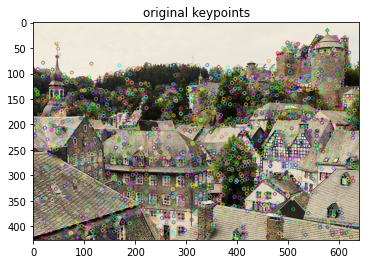

In [6]:
# Write your code here and display original image and images obtained in 1(a) and 1(b)
img = cv2.imread("Village.png")
orig_img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sift = SiftDetector(params = None)
kp,des = sift.detector.detectAndCompute(orig_img_gray, None)
kp_gray = cv2.drawKeypoints(img, kp, orig_img_gray)
kp_gray = cv2.cvtColor(kp_gray, cv2.COLOR_BGR2RGB)
print("The number of SIFT features with default parameters: ", len(kp))
plt.title("original keypoints")
plt.imshow(kp_gray)

#### 1 (b)
Try different contrast_thresholds and find that the number of features is the closest to 10% of the original figure when the threshold is 0.235

The number of SIFT features with contrast_threshold = 0.235:  258


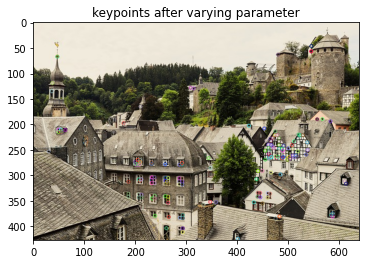

In [7]:
p = {
    'n_features': 0,
    'n_octave_layers': 3,
    'contrast_threshold': 0.235,
    'edge_threshold': 10,
    'sigma': 1.6
}
sift = SiftDetector(params = p)
kp,des = sift.detector.detectAndCompute(orig_img_gray, None)
kp_gray = cv2.drawKeypoints(img, kp, orig_img_gray)
kp_gray = cv2.cvtColor(kp_gray, cv2.COLOR_BGR2RGB)
print("The number of SIFT features with contrast_threshold = 0.235: ", len(kp))
plt.title("keypoints after varying parameter")
plt.imshow(kp_gray)


## Task 2: Change the scale of the image and recompute the SIFT features.
- Enlarge the given image by a scale percentage of 120.
- Extract the SIFT features and show the keypoints on the scaled image using the same parameter setting as for Task 1 (for the reduced number of keypoints).
- Inspect the keypoints visually: Are the keypoints of the scaled image roughly the same as those of the original image? What does this observation imply?
- Match the SIFT descriptors of the keypoints of the scaled image with those of the original image using the nearest-neighbour distance ratio method. Show the keypoints of the 5 best-matching descriptors on both the original and the scaled image. Hint: Brute-force matching is available in OpenCV for feature matching.


The number of SIFT features with scaled image:  258


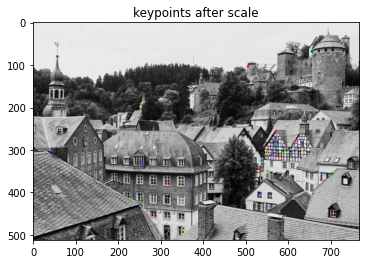

In [8]:
# Write your code here and display images obtained in 2(b) and 2(d). Also, write your answer to 2(c) in a new cell.
# 2(a)
percentage = 1.20
row, col, c = img.shape
scale_col = int(col * percentage)
scale_row = int(row * percentage)
dim = (scale_col, scale_row)
resize_img = cv2.resize(orig_img_gray, dim, interpolation=cv2.INTER_AREA)
# 2(b)
kp_scale, des_scale = sift.detector.detectAndCompute(resize_img, None)
kp_gray_scale = cv2.drawKeypoints(resize_img, kp_scale, resize_img)
print("The number of SIFT features with scaled image: ", len(kp))
plt.title("keypoints after scale")
kp_gray_scale = cv2.cvtColor(kp_gray_scale, cv2.COLOR_BGR2RGB)
plt.imshow(kp_gray_scale)

#### 2(c)
Yes, the scaling of the image does not affect how the algorithm matches keypoints

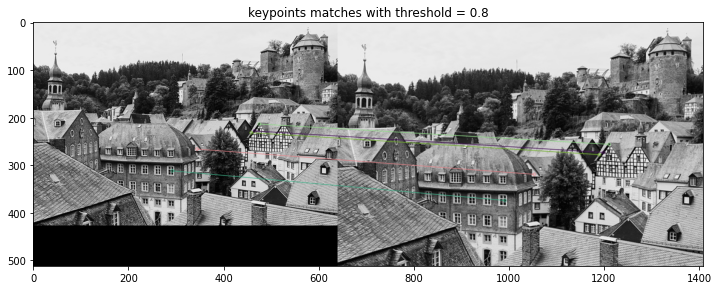

In [9]:
# 2(d)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des, des_scale, k = 2)
good = []
top5_matches = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        top5_matches.append(m.distance)
top5_matches.sort(reverse = False)
for m, n in matches:
    if m.distance in top5_matches[:5]:
        good.append([m])
plt.figure(figsize=(12, 12))
img_matches = cv2.drawMatchesKnn(orig_img_gray, kp, resize_img, kp_scale, good, None,flags = 2)
plt.title("keypoints matches with threshold = 0.8")
plt.imshow(img_matches)

## Task 3: Rotate the image and recompute the SIFT features.
- Rotate the given image anticlockwise by 65 degrees and separately also by 125 degrees.
- Extract the SIFT features and show the keypoints on the rotated image using the same parameter setting as for Task 1 (for the reduced number of keypoints).
- Inspect the keypoints visually: Are the keypoints of the rotated image roughly the same as those of the original image? What does this observation imply?
- Match the SIFT descriptors of the keypoints of the rotated image with those of the original image using the nearest-neighbour distance ratio method. Show the keypoints of the 5 best-matching descriptors on both the original and the rotated image.

In [10]:
# Write your code here and display images obtained in 3(b) and 3(d). Also, write your answer to 3(c) in a new cell.

Number of SIFT features after 65 degrees rotation:  149


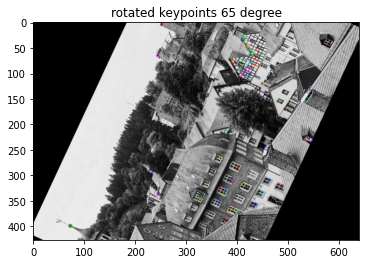

Number of SIFT features after 120 degrees rotation:  155


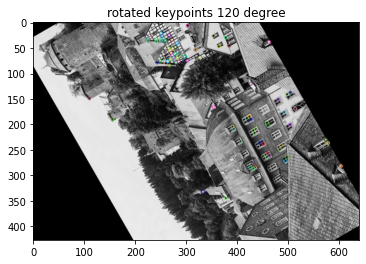

In [11]:
angle1 = 65
angle2 = 120
img_center = get_img_center(orig_img_gray)
x = img_center[1]
y = img_center[0]
rotate_img1 = rotate(orig_img_gray, x, y, angle1)
rotate_img2 = rotate(orig_img_gray, x, y, angle2)
kp_r1, des_r1 = sift.detector.detectAndCompute(rotate_img1, None)
kp_r2, des_r2 = sift.detector.detectAndCompute(rotate_img2, None)
kp_r1_gray = cv2.drawKeypoints(rotate_img1, kp_r1, None)
kp_r2_gray = cv2.drawKeypoints(rotate_img2, kp_r2, None)
print("Number of SIFT features after 65 degrees rotation: ", len(kp_r1))
plt.figure(1)
plt.title("rotated keypoints 65 degree")
plt.imshow(kp_r1_gray)
plt.show()
print("Number of SIFT features after 120 degrees rotation: ", len(kp_r2))
plt.figure(2)
plt.title("rotated keypoints 120 degree")
plt.imshow(kp_r2_gray)
plt.show()


#### 3(c)
Yes, the rotation of the image does not affect how the algorithm matches keypoints

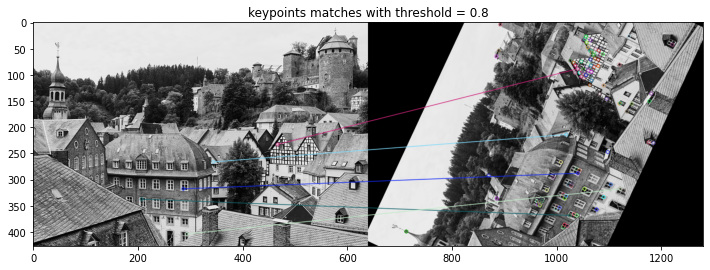

In [12]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des, des_r1, k = 2)
good = []
top5_matches = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        top5_matches.append(m.distance)
top5_matches.sort(reverse = False)
for m, n in matches:
    if m.distance in top5_matches[:5]:
        good.append([m])
plt.figure(figsize=(12, 12))
img_matches = cv2.drawMatchesKnn(orig_img_gray, kp, kp_r1_gray, kp_r1, good, None,flags = 2)
plt.title("keypoints matches with threshold = 0.8")
plt.imshow(img_matches)

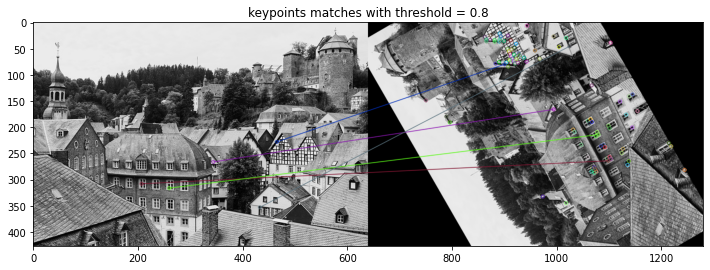

In [13]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des, des_r2, k = 2)
good = []
top5_matches = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        top5_matches.append(m.distance)
top5_matches.sort(reverse = False)
for m, n in matches:
    if m.distance in top5_matches[:5]:
        good.append([m])
plt.figure(figsize=(12, 12))
img_matches = cv2.drawMatchesKnn(orig_img_gray, kp, kp_r2_gray, kp_r2, good, None,flags = 2)
plt.title("keypoints matches with threshold = 0.8")
plt.imshow(img_matches)